In [1]:
%precision 3
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
population = stats.norm(loc=4, scale=0.8)

In [4]:
sample_mean_array = np.zeros(10000)

In [5]:
np.random.seed(1)
for i in range(0,10000):
    sample = population.rvs(size=10)
    sample_mean_array[i]=sp.mean(sample)

<ipython-input-5-319fb892ccf6>:4: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i]=sp.mean(sample)


In [6]:
sample_mean_array

array([3.92228729, 3.86432929, 4.06953003, ..., 4.13616562, 4.57489661,
       4.09896685])

In [7]:
sp.mean(sample_mean_array)

<ipython-input-7-cede0e2d07e0>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(sample_mean_array)


4.004202422791747

In [8]:
sp.std(sample_mean_array, ddof=1)

<ipython-input-8-532a5ef64176>:1: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sp.std(sample_mean_array, ddof=1)


0.2513580850860402

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

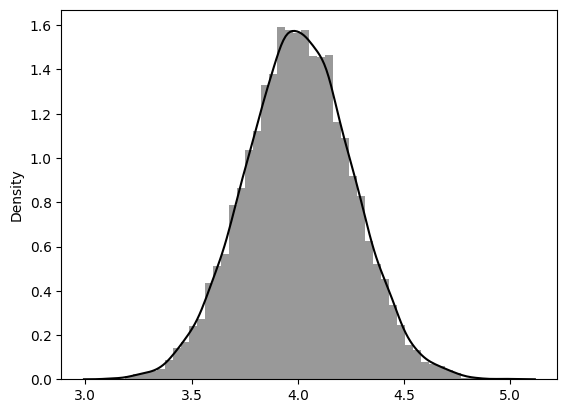

In [9]:
sns.distplot(sample_mean_array, color='black')

In [11]:
size_array = np.arange(start=10,stop=100100,step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [12]:
sample_mean_array_size=np.zeros(len(size_array))

In [13]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

<ipython-input-13-cd762df414bb>:4: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array_size[i] = sp.mean(sample)


Text(0, 0.5, 'sample mean')

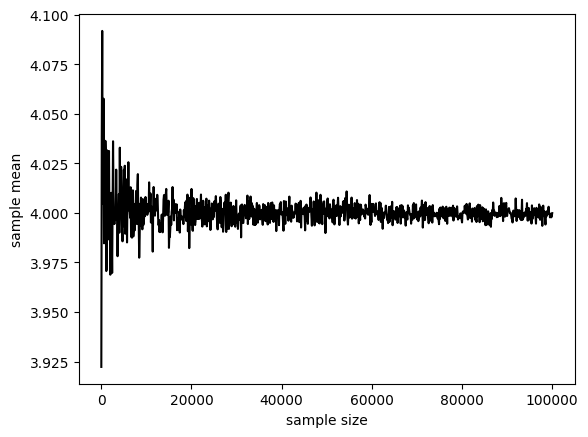

In [14]:
plt.plot(size_array, sample_mean_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

In [15]:
def calc_sample_mean (size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = sp.mean(sample)
    return (sample_mean_array)

In [17]:
np.random.seed(1)
size_10 = calc_sample_mean(size=10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean": size_10,
    "size": np.tile("size 10", 10000)
})
size_20 = calc_sample_mean(size=20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean": size_20,
    "size": np.tile("size 20", 10000)
})
size_30 = calc_sample_mean(size=30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean": size_30,
    "size": np.tile("size 30", 10000)
})
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df]
)
print(sim_result.head)

<ipython-input-15-3b2ff68fb3a0>:5: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)
<bound method NDFrame.head of       sample_mean     size
0        3.922287  size 10
1        3.864329  size 10
2        4.069530  size 10
3        3.857140  size 10
4        4.184654  size 10
...           ...      ...
9995     3.980022  size 30
9996     3.770016  size 30
9997     3.930151  size 30
9998     4.075567  size 30
9999     3.976259  size 30

[30000 rows x 2 columns]>


<AxesSubplot:xlabel='size', ylabel='sample_mean'>

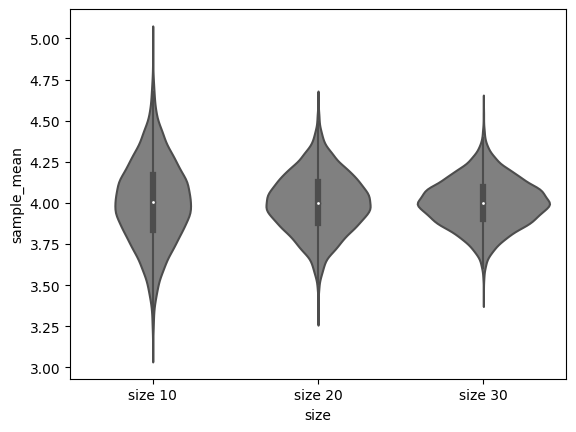

In [18]:
sns.violinplot(x="size", y = "sample_mean", data = sim_result, color="gray")